## Table of contents

#### 01. Importing libraries 
#### 02. Wrangling and cleaning data
#### 03. Time-series analysis    
    Decomposition   
#### 04. Testing for ststionarity
    Dickey-Fuller test
    Autocorrelation      

### 01. Importing libraries 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Create a folder path

path = r'/Users/edytakowal/Desktop/CareerFoundry/2. Data Immersion/6. Advanced Analytics & Dashboard Design/World_Happiness_Report'

In [3]:
# Import the data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', '2015-2023.csv'), index_col = False)
df.head()

,Unnamed: 0,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category,annual_average,avg_annual_region,avg_annual
0,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,7.493322,Happy,5.375734,6.689619,5.375734
1,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,7.522278,Happy,5.375734,6.689619,5.375734
2,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,7.579733,Happy,5.375734,6.689619,5.375734
3,3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,7.473889,Happy,5.375734,6.689619,5.375734
4,4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,7.230456,Happy,5.375734,7.279000,5.375734


In [4]:
# Drop coulumn 'Unnamed: 0'

df = df.drop(columns = ['Unnamed: 0'])

### 02. Wrangling and cleaning data

In [5]:
# Create a subset 

sub = df[df['country'] == 'Poland'][['year', 'happiness_score']]
sub

,year,happiness_score
59,2015,5.7910
214,2016,5.8350
360,2017,5.9730
511,2018,6.1230
665,2019,6.1820
824,2020,6.1863
978,2021,6.1660
1131,2022,6.1230
1268,2023,6.2600


In [6]:
# Reset the index

sub = sub.reset_index()
sub

,index,year,happiness_score
0,59,2015,5.7910
1,214,2016,5.8350
2,360,2017,5.9730
3,511,2018,6.1230
4,665,2019,6.1820
5,824,2020,6.1863
6,978,2021,6.1660
7,1131,2022,6.1230
8,1268,2023,6.2600


In [7]:
# Set column 'Year' as an index
sub = sub.set_index('year')

In [8]:
# Drop unnecessary columns

sub = sub.drop(columns = ['index'])
sub

,happiness_score
year,
2015,5.7910
2016,5.8350
2017,5.9730
2018,6.1230
2019,6.1820
2020,6.1863
2021,6.1660
2022,6.1230
2023,6.2600


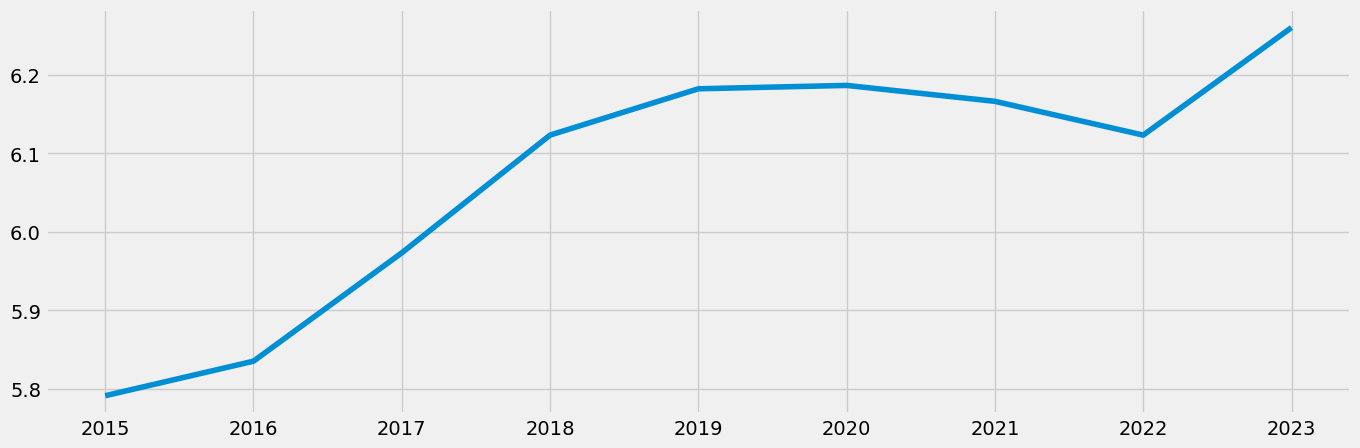

In [9]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub)

### 3. Time-series analysis: decomposition

In [10]:
# Decompose the time series using an 'additative' model

decomposition = sm.tsa.seasonal_decompose(sub, model = 'additative', period=1)

In [11]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

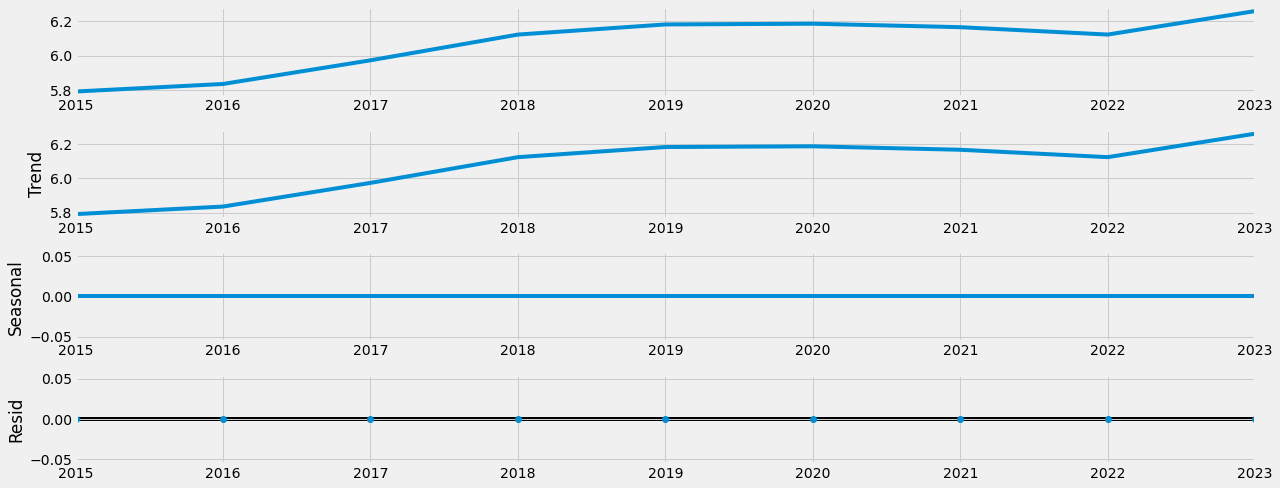

In [12]:
# Plot the separate components

decomposition.plot()
plt.show()

### 04. Testing for stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub['happiness_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.489462
p-value                        0.538718
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


#### Autocorrelation

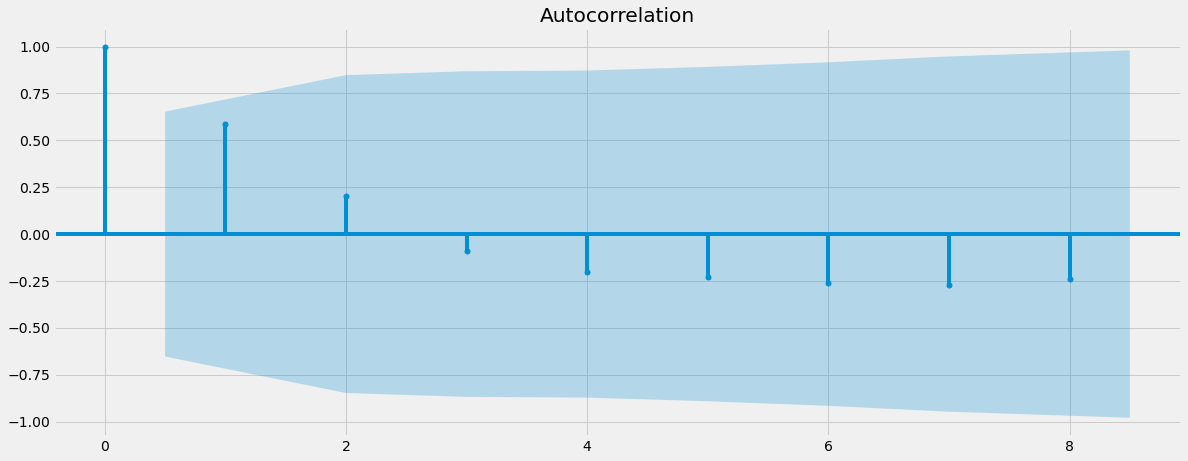

In [14]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub)
plt.show()

#### Deriving new columns

In [15]:
# Count and create total annual average

df['avg_annual'] = df.groupby('year')['happiness_score'].transform('mean')
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category,annual_average,avg_annual_region,avg_annual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,7.493322,Happy,5.375734,6.689619,5.375734
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,7.522278,Happy,5.375734,6.689619,5.375734
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,7.579733,Happy,5.375734,6.689619,5.375734
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,7.473889,Happy,5.375734,6.689619,5.375734
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,7.230456,Happy,5.375734,7.279000,5.375734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,Democratic Republic of the Congo,Sub-Saharan Africa,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023,133,4.178571,Not happy,5.544441,4.382485,5.544441
1362,Zimbabwe,Sub-Saharan Africa,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023,134,3.630689,Not happy,5.544441,4.382485,5.544441
1363,Sierra Leone,Sub-Saharan Africa,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023,135,4.142600,Not happy,5.544441,4.382485,5.544441
1364,Lebanon,Middle East and North Africa,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023,136,4.494500,Not happy,5.544441,5.117077,5.544441


In [16]:
# Count and create regional annual average

df['avg_annual_region'] = df.groupby(['year', 'region'])['happiness_score'].transform('mean')
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category,annual_average,avg_annual_region,avg_annual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,7.493322,Happy,5.375734,6.689619,5.375734
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,7.522278,Happy,5.375734,6.689619,5.375734
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,7.579733,Happy,5.375734,6.689619,5.375734
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,7.473889,Happy,5.375734,6.689619,5.375734
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,7.230456,Happy,5.375734,7.279000,5.375734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,Democratic Republic of the Congo,Sub-Saharan Africa,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023,133,4.178571,Not happy,5.544441,4.382485,5.544441
1362,Zimbabwe,Sub-Saharan Africa,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023,134,3.630689,Not happy,5.544441,4.382485,5.544441
1363,Sierra Leone,Sub-Saharan Africa,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023,135,4.142600,Not happy,5.544441,4.382485,5.544441
1364,Lebanon,Middle East and North Africa,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023,136,4.494500,Not happy,5.544441,5.117077,5.544441


In [17]:
df['region'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Southeast Asia', 'Central and Eastern Europe', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [29]:
df[df['country'] == 'Cyprus']

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category,annual_average,avg_annual_region,avg_annual
66,Cyprus,Western Europe,5.689,1.208130,0.893180,0.923560,0.406720,0.306380,0.061460,2015,67,5.904545,Moderately happy,5.375734,6.689619,5.375734
226,Cyprus,Western Europe,5.546,1.318570,0.706970,0.848800,0.295070,0.279060,0.052280,2016,69,5.904545,Moderately happy,5.382185,6.685667,5.382185
379,Cyprus,Western Europe,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,2017,65,5.904545,Moderately happy,5.354019,6.703714,5.354019
527,Cyprus,Western Europe,5.835,1.229000,1.211000,0.909000,0.495000,0.179000,0.154000,2018,58,5.904545,Moderately happy,5.375917,6.781762,5.375917
530,Cyprus,Western Europe,5.762,1.229000,1.191000,0.909000,0.423000,0.202000,0.035000,2018,61,5.904545,Moderately happy,5.375917,6.781762,5.375917
674,Cyprus,Western Europe,6.046,1.263000,1.223000,1.042000,0.406000,0.190000,0.041000,2019,49,5.904545,Moderately happy,5.407096,6.842190,5.407096
689,Cyprus,Western Europe,5.718,1.263000,1.252000,1.042000,0.417000,0.191000,0.162000,2019,64,5.904545,Moderately happy,5.407096,6.842190,5.407096
826,Cyprus,Western Europe,6.159,1.212799,1.149171,1.026125,0.459386,0.227932,0.051207,2020,45,5.904545,Moderately happy,5.473240,6.899219,5.473240
973,Cyprus,Western Europe,6.223,1.377000,0.765000,0.801000,0.464000,0.178000,0.061000,2021,39,5.904545,Moderately happy,5.532839,6.914905,5.532839
1124,Cyprus,Western Europe,6.221,1.815000,0.909000,0.819000,0.448000,0.123000,0.062000,2022,41,5.904545,Moderately happy,5.553575,6.895667,5.553575


In [18]:
df[df['region'] == 'Commonwealth of Independent States']

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category,annual_average,avg_annual_region,avg_annual
43,Uzbekistan,Commonwealth of Independent States,6.0030,0.632440,1.340430,0.597720,0.658210,0.228370,0.308260,2015,44,6.082733,Happy,5.375734,5.49560,5.375734
53,Kazakhstan,Commonwealth of Independent States,5.8550,1.122540,1.122410,0.643680,0.516490,0.118270,0.084540,2015,54,5.975544,Moderately happy,5.375734,5.49560,5.375734
69,Turkmenistan,Commonwealth of Independent States,5.5480,0.958470,1.226680,0.538860,0.476100,0.169790,0.308440,2015,70,5.446263,Moderately happy,5.375734,5.49560,5.375734
76,Kyrgyzstan,Commonwealth of Independent States,5.2860,0.474280,1.151150,0.650880,0.434770,0.300300,0.042320,2015,77,5.422833,Moderately happy,5.375734,5.49560,5.375734
105,Tajikistan,Commonwealth of Independent States,4.7860,0.390470,0.855630,0.573790,0.472160,0.229740,0.150720,2015,106,5.246411,Moderately happy,5.375734,5.49560,5.375734
206,Uzbekistan,Commonwealth of Independent States,5.9870,0.735910,1.168100,0.501630,0.608480,0.343260,0.283330,2016,49,6.082733,Happy,5.382185,5.54900,5.382185
211,Kazakhstan,Commonwealth of Independent States,5.9190,1.229430,0.955440,0.573860,0.405200,0.150110,0.111320,2016,54,5.975544,Moderately happy,5.382185,5.54900,5.382185
222,Turkmenistan,Commonwealth of Independent States,5.6580,1.080170,1.038170,0.440060,0.374080,0.225670,0.284670,2016,65,5.446263,Moderately happy,5.382185,5.54900,5.382185
242,Kyrgyzstan,Commonwealth of Independent States,5.1850,0.560440,0.954340,0.554490,0.402120,0.384320,0.047620,2016,85,5.422833,Moderately happy,5.382185,5.54900,5.382185
257,Tajikistan,Commonwealth of Independent States,4.9960,0.488350,0.756020,0.531190,0.434080,0.259980,0.135090,2016,100,5.246411,Moderately happy,5.382185,5.54900,5.382185


In [19]:
#### Create a time series for annual average Happiness

In [20]:
# Create a subset 

sub1 = df[['year', 'avg_annual']]
sub1

,year,avg_annual
0,2015,5.375734
1,2015,5.375734
2,2015,5.375734
3,2015,5.375734
4,2015,5.375734
...,...,...
1361,2023,5.544441
1362,2023,5.544441
1363,2023,5.544441
1364,2023,5.544441


In [21]:
# Reset the index

sub1 = sub1.reset_index()
sub1

,index,year,avg_annual
0,0,2015,5.375734
1,1,2015,5.375734
2,2,2015,5.375734
3,3,2015,5.375734
4,4,2015,5.375734
...,...,...,...
1361,1361,2023,5.544441
1362,1362,2023,5.544441
1363,1363,2023,5.544441
1364,1364,2023,5.544441


In [22]:
sub1 = sub1.set_index('year')
sub1

,index,avg_annual
year,,
2015,0,5.375734
2015,1,5.375734
2015,2,5.375734
2015,3,5.375734
2015,4,5.375734
...,...,...
2023,1361,5.544441
2023,1362,5.544441
2023,1363,5.544441


In [23]:
sub1

,index,avg_annual
year,,
2015,0,5.375734
2015,1,5.375734
2015,2,5.375734
2015,3,5.375734
2015,4,5.375734
...,...,...
2023,1361,5.544441
2023,1362,5.544441
2023,1363,5.544441


In [24]:
# Drop unnecessary columns

sub1 = sub1.drop(columns = ['index'])
sub1

,avg_annual
year,
2015,5.375734
2015,5.375734
2015,5.375734
2015,5.375734
2015,5.375734
...,...
2023,5.544441
2023,5.544441
2023,5.544441


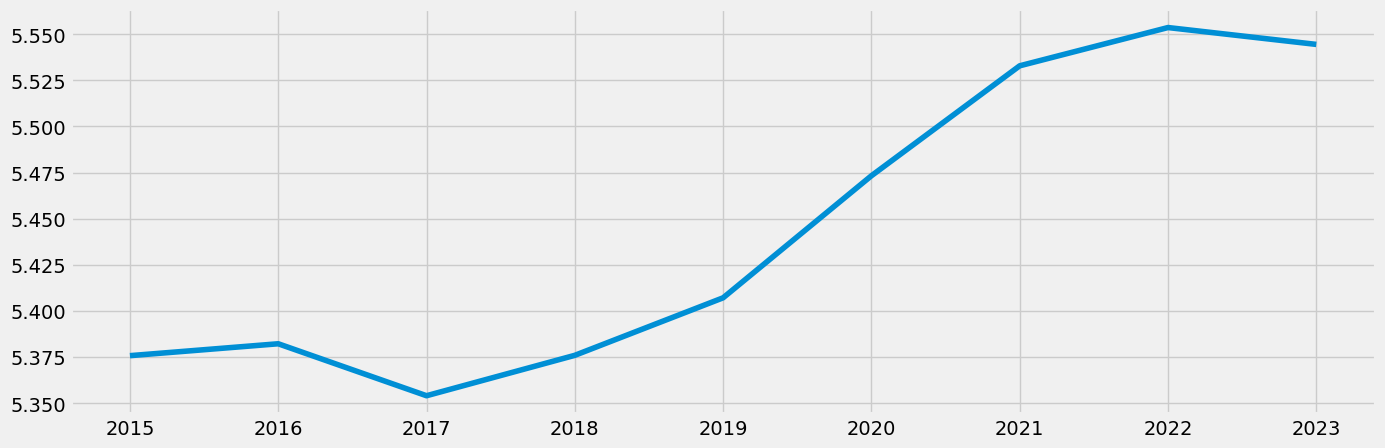

In [25]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub1)

In [26]:
# Export the df as a csv file

df.to_csv(os.path.join(path, 'Data', 'Prepared Data', '2015-2023.csv'))